# 1D Convolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype='float32')

In [5]:
b = np.array([-1, 1], dtype='float32')

(-2.0, 2.0)

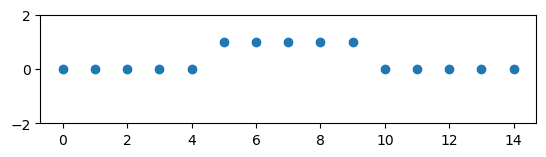

In [7]:
plt.subplot(311)
plt.plot(a, 'o')
plt.ylim([-2, 2])

(-2.0, 2.0)

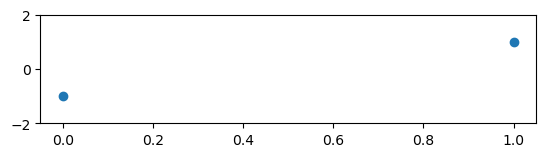

In [9]:
plt.subplot(311)
plt.plot(b, 'o')
plt.ylim([-2, 2])

In [11]:
c = np.convolve(a, b)

In [13]:
print(c)

[ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


In [15]:
?np.convolve

Signature:       np.convolve(a, v, mode='full')
Call signature:  np.convolve(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function convolve at 0x10ab8f740>
File:            /opt/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py
Docstring:      
Returns the discrete, linear convolution of two one-dimensional sequences.

The convolution operator is often seen in signal processing, where it
models the effect of a linear time-invariant system on a signal [1]_.  In
probability theory, the sum of two independent random variables is
distributed according to the convolution of their individual
distributions.

If `v` is longer than `a`, the arrays are swapped before computation.

Parameters
----------
a : (N,) array_like
    First one-dimensional input array.
v : (M,) array_like
    Second one-dimensional input array.
mode : {'full', 'valid', 'same'}, optional
    'full':
      By default, mode is 'full'.  This returns the convolution
      at each poi

(-2.0, 2.0)

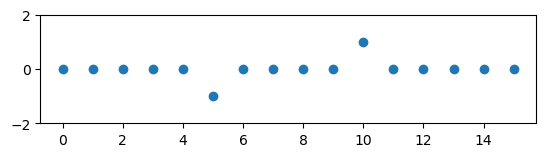

In [17]:
plt.subplot(311)
plt.plot(c, 'o')
plt.ylim([-2, 2])

#### Convolutions as a filter

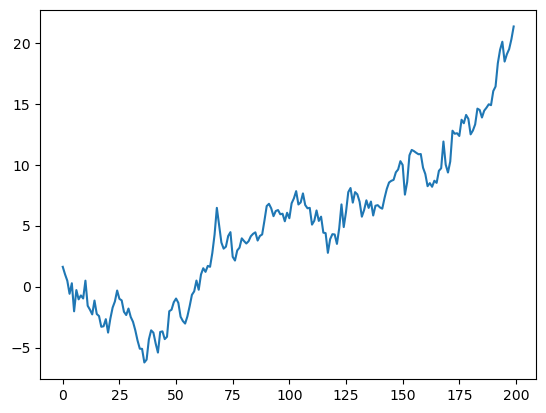

In [20]:
np.random.seed(1)
x = np.random.normal(0, 1, size=200).cumsum()
plt.plot(x)

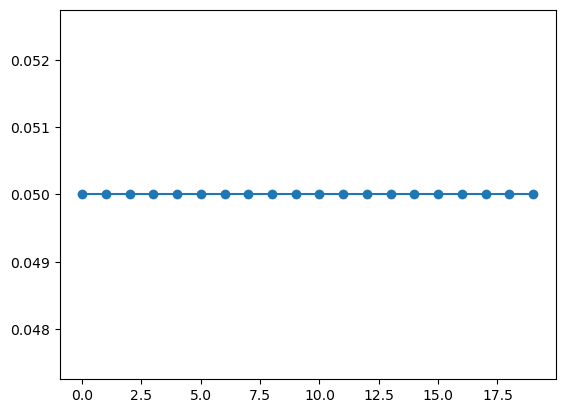

In [22]:
# f = np.array([0.1, 0.2, 0.4, 0.5, 0.4, 0.2, 0.1])
f = np.ones(20) / 20
plt.plot(f, 'o-')

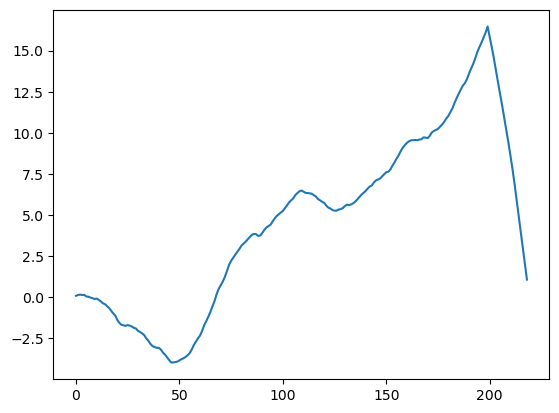

In [29]:
result = np.convolve(x, f)
plt.plot(result)

```python
x = np.random.normal(0, 1, size=200).cumsum()
f = np.ones(20) / 20
result = np.convolve(x, f)
```
이 코드는 신호(데이터) x에 대해 이동평균(moving average) 필터를 적용하는 과정입니다.

### 하나씩 해석해볼게요.
`x = np.random.normal(0, 1, size=200).cumsum()`
- 평균 0, 표준편차 1인 정규분포에서 200개의 랜덤 숫자를 뽑아요.
- .cumsum()은 누적합(cumulative sum)을 의미합니다.
- 결과적으로, x는 **무작위 걷기(random walk)**처럼 점점 누적된 시계열 데이터가 됩니다.
- 즉, x는 200개의 시계열 데이터 포인트.

`f = np.ones(20) / 20`

- 길이가 20인 배열을 만들고, 모두 1로 채워요.
- 그걸 20으로 나누면, 각 요소가 1/20 = 0.05가 됨.
- 즉, f는 길이 20인 **균일한 가중치를 가진 필터(커널)**입니다.
- 이것은 "20개 구간의 평균"을 구하는 역할을 합니다.

`result = np.convolve(x, f)`

- np.convolve는 두 신호의 합성곱(컨볼루션)을 계산합니다.
- 여기서 x에 f를 컨볼루션하면, x의 각 위치에 대해 주변 20개의 값 평균을 구하는 것과 비슷합니다.
- 즉, result는 x의 이동평균(moving average) 결과입니다.
- 이동평균은 원 신호의 잡음(noise)을 줄이고, 추세(trend)를 부드럽게 만드는데 많이 사용됩니다.

### 왜 이렇게 하냐면?
- 누적합으로 만든 x는 불규칙하게 변동하는 데이터이지만, 뭔가 추세가 보이게 됨.
- 그런데 여전히 작은 변동들이 존재하므로, 이동평균을 통해 변동 폭을 줄이고 좀 더 부드러운 신호로 바꾸려는 목적입니다.
- f가 길이 20인 균일 필터라서, 20개의 연속된 점의 평균을 구하는 효과가 있어요.

### 2D Convolutions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve
from scipy.signal import convolve2d
# from scipy import misc
from scipy.datasets import ascent

In [2]:
pip install pooch

Note: you may need to restart the kernel to use updated packages.


In [5]:
# img = misc.ascent()
# img = (img - img.mean()) / img.std()

# 이미지 불러오기
img = ascent()

# float으로 변환 후 정규화
img = img.astype(np.float32)
img = (img - img.mean()) / img.std()

In [7]:
img.shape

(512, 512)

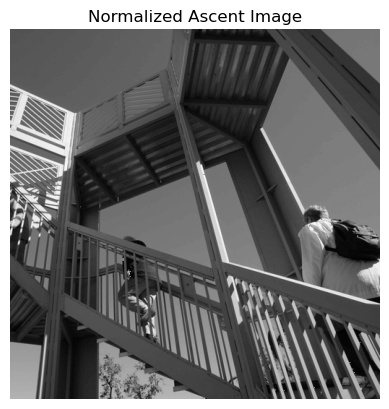

In [9]:
plt.title("Normalized Ascent Image")
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

In [11]:
# horizontal lines where top is white and bottom is black
h_kernel = np.array([[ 1,  2,  1],
                     [ 0,  0,  0],
                     [-1, -2, -1]])

### 수평 Sobel 필터 (Horizontal Sobel Filter)
- 이 커널은 이미지의 수평 방향에서 **경계(에지)**를 감지합니다.
- 위쪽 픽셀 값에서 아래쪽 픽셀 값을 빼서 경계 차이를 강조합니다.
- "위는 흰색(밝음), 아래는 검정(어두움)"인 경우 경계가 강하게 나타납니다.
- 주로 밝기 변화가 수직 방향으로 발생할 때, 이를 감지함.
#### 효과 예시
- 이 필터를 흑백 이미지에 적용하면:
- 수평 경계(즉, 위에서 아래로 급격히 밝기 변화가 있는 부분)를 강조합니다.
- 예: 옷의 단, 눈썹, 풍경의 지평선 등

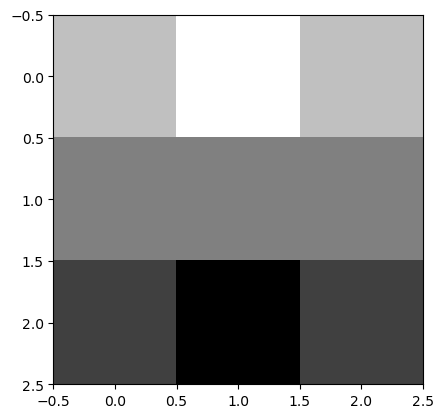

In [17]:
plt.imshow(h_kernel, cmap='gray')

In [19]:
?convolve2d

Signature: convolve2d(in1, in2, mode='full', boundary='fill', fillvalue=0)
Docstring:
Convolve two 2-dimensional arrays.

Convolve `in1` and `in2` with output size determined by `mode`, and
boundary conditions determined by `boundary` and `fillvalue`.

Parameters
----------
in1 : array_like
    First input.
in2 : array_like
    Second input. Should have the same number of dimensions as `in1`.
mode : str {'full', 'valid', 'same'}, optional
    A string indicating the size of the output:

    ``full``
       The output is the full discrete linear convolution
       of the inputs. (Default)
    ``valid``
       The output consists only of those elements that do not
       rely on the zero-padding. In 'valid' mode, either `in1` or `in2`
       must be at least as large as the other in every dimension.
    ``same``
       The output is the same size as `in1`, centered
       with respect to the 'full' output.
boundary : str {'fill', 'wrap', 'symm'}, optional
    A flag indicating how to han

### convolve2d란?
`from scipy.signal import convolve2d`
- SciPy에서 제공하는 함수로, 2차원 배열 간의 합성곱(convolution)을 계산합니다.
- 입력으로 이미지와 필터(커널)를 받아서, 필터를 이미지 위에 슬라이딩하면서 계산합니다.
#### 함수 시그니처
`convolve2d(in1, in2, mode='full', boundary='fill', fillvalue=0)`
##### 주요인자 설명    
| 인자          | 설명                                           |
| ----------- | -------------------------------------------- |
| `in1`       | 첫 번째 입력 배열 (보통 원본 이미지)                       |
| `in2`       | 두 번째 입력 배열 (커널, 필터)                          |
| `mode`      | 출력 크기 선택: `'full'`, `'same'`, `'valid'`      |
| `boundary`  | 가장자리를 어떻게 처리할지: `'fill'`, `'wrap'`, `'symm'` |
| `fillvalue` | `boundary='fill'`일 때 채울 값 (기본값: 0)           |

##### mode 종류
| mode 값    | 설명                                    |
| --------- | ------------------------------------- |
| `'full'`  | 필터가 이미지 밖까지 계산 → 결과가 커짐               |
| `'same'`  | 입력과 동일한 크기 결과 (중앙에 맞춰 자름) ← **가장 흔함** |
| `'valid'` | 필터가 완전히 이미지 안에 있을 때만 계산 → 결과가 작아짐     |

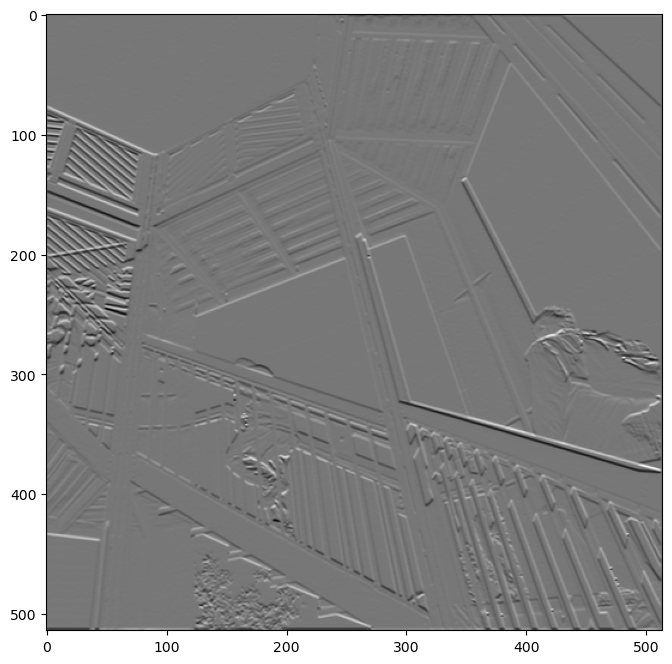

In [31]:
res = convolve2d(img, h_kernel)

# Black is where the pattern was found, white is the opposite pattern and grey is where there was a mix
plt.figure(figsize=(8, 8))
plt.imshow(res, cmap='gray')

In [33]:
# Special kernel for edge detection
kernel = np.array([[ 0,  0, -1,  0,  0],
                   [ 0, -1, -2, -1,  0],
                   [-1, -2, 16, -2, -1],
                   [ 0, -1, -2, -1,  0],
                   [ 0,  0, -1,  0,  0],])

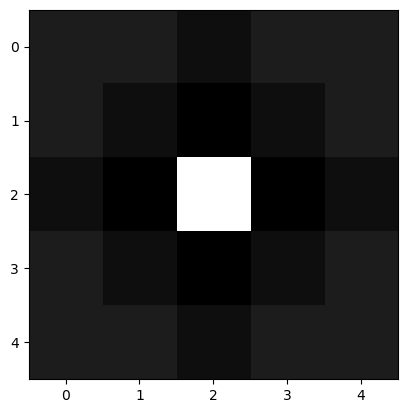

In [35]:
plt.imshow(kernel, cmap='gray')

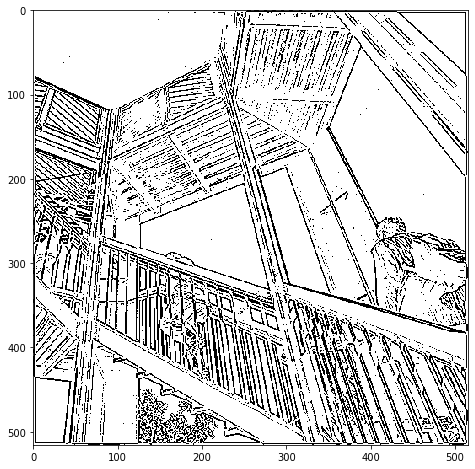

In [ ]:
x = convolve2d(img, kernel) # Convolve image with kernel
x = x > 1 # Threshold the values to increase the contrast of the result
plt.figure(figsize=(12, 8))
plt.imshow(x, cmap='Greys')

# Convolutional Layer

In [55]:
#%tensorflow_version 2.x
import numpy as np
from scipy.datasets import ascent
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Sequential
%matplotlib inline

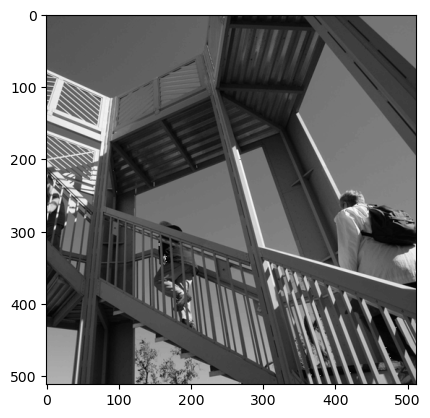

In [77]:
img = ascent()
plt.imshow(img, cmap='gray')
plt.show()

In [79]:
img_tensor = img.reshape((1, 512, 512, 1))

In [81]:
from tensorflow.keras.layers import Conv2D

In [83]:
?Conv2D

Init signature:
Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Docstring:     
2D convolution layer.

This layer creates a convolution kernel that is convolved with the layer
input over a 2D spatial (or temporal) dimension (height and width) to
produce a tensor of outputs. If `use_bias` is True, a bias vector is created
and added to the outputs. Finally, if `activation` is not `None`, it is
applied to the outputs as well.

Note on numerical precision: While in general Keras operation execution
results are identical across backends up to 1e-7 precision in float32,
`Conv2D` operations may show larger variations. Due to the large
num

In [85]:
model = Sequential()
model.add(Input(shape=(512,512,1)))
model.add(Conv2D(10, kernel_size=(3, 3)))

# this doesnt matter, but we have to do it
model.compile('adam', 'mse')

In [87]:
img_pred_tensor = model.predict(img_tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [89]:
img_pred_tensor.shape

(1, 510, 510, 10)

In [91]:
img_pred = img_pred_tensor[0, :, :, 0]
img_pred.shape

(510, 510)

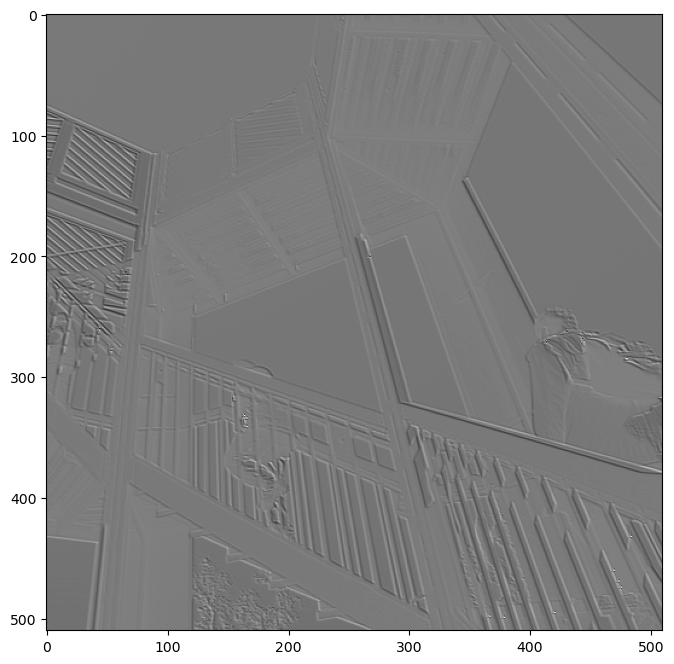

In [93]:
plt.figure(figsize=(12, 8))
plt.imshow(img_pred, cmap='gray')
plt.show()

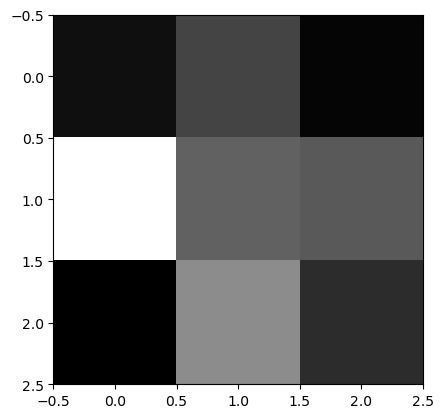

In [95]:
weights = model.get_weights()
weights[1].shape
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')
plt.show()

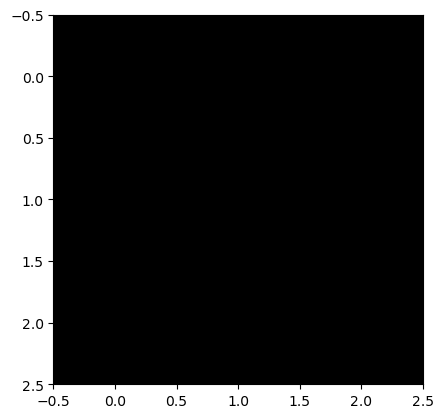

In [97]:
weights[0] = np.ones((weights[0].shape))
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')
plt.show()

In [99]:
model.set_weights(weights)

In [101]:
img_pred_tensor = model.predict(img_tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [103]:
img_pred = img_pred_tensor[0, :, :, 0]

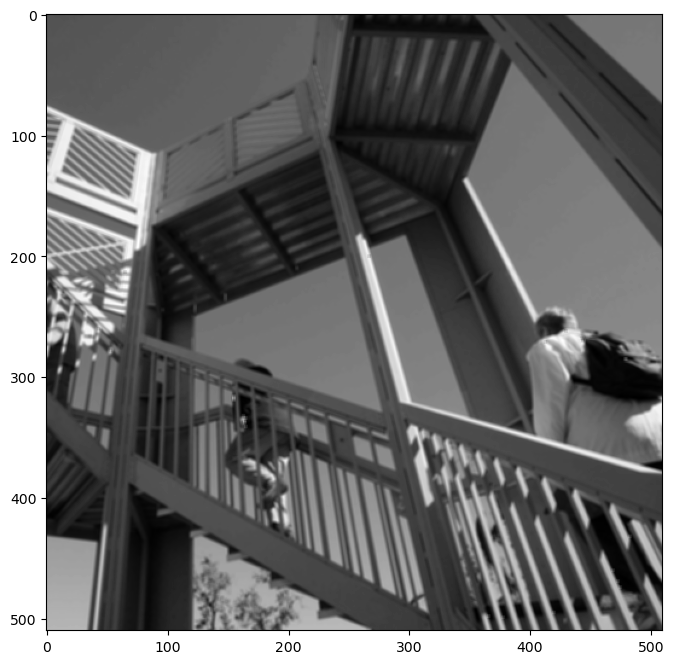

In [109]:
plt.figure(figsize=(12, 8))
plt.imshow(img_pred, cmap='gray')
plt.show()

# Pooling Layer

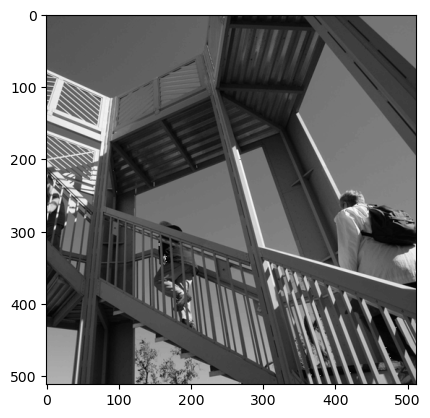

In [111]:
img = ascent()
plt.imshow(img, cmap='gray')
plt.show()

In [113]:
from tensorflow.keras.layers import MaxPool2D, AvgPool2D

In [115]:
model = Sequential()
model.add(Input(shape=(512,512,1)))
model.add(MaxPool2D((5, 5)))
model.compile('adam', 'mse')

In [117]:
img_tensor = img.reshape((1, 512, 512, 1))
img_pred = model.predict(img_tensor)[0, :, :, 0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


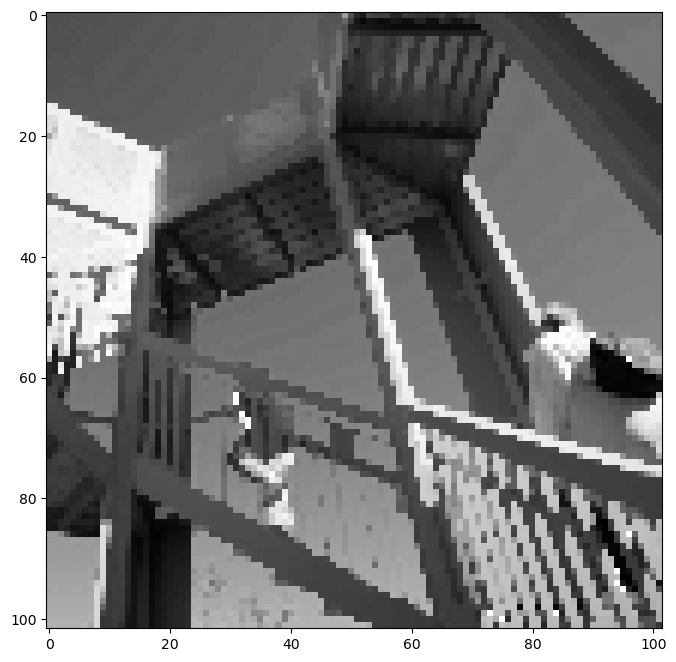

In [119]:
# maximum value of each patch
plt.figure(figsize=(12, 8))
plt.imshow(img_pred, cmap='gray')
plt.show()

In [121]:
# What is the shape?
img_pred.shape

(102, 102)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


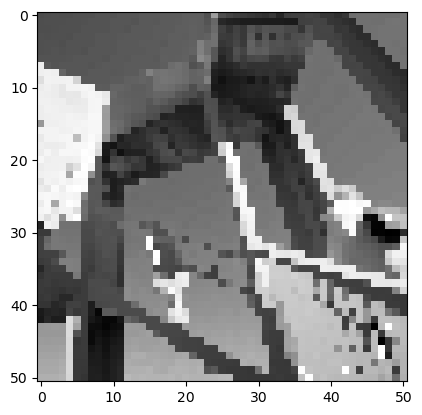

In [123]:
model = Sequential()
model.add(Input(shape=(512,512,1)))
model.add(MaxPool2D((10, 10)))
model.compile('adam', 'mse')

# average value of each patch
img_pred = model.predict(img_tensor)[0, :, :, 0]
plt.imshow(img_pred, cmap='gray')
plt.show()